In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

%matplotlib inline

df = pd.DataFrame()

directory = '.\\csse_covid_19_data\\csse_covid_19_daily_reports_us\\'
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        dNew = pd.read_csv(directory + filename)
        dNew['date'] = filename[0:10]
        df = pd.concat([df,dNew])
    else:
        continue
    
df['date'] = pd.to_datetime(df['date'])
 
df = df.groupby(['date'])[['Confirmed', 'Deaths','Recovered','Active','People_Tested','People_Hospitalized']].sum().reset_index()
df.rename(columns={'Confirmed': 'cases'
                    ,'Deaths': 'deaths'
                  ,'Recovered': 'recovered'
                  ,'Active':'active'
                  ,'People_Tested':'tested'
                  ,'People_Hospitalized':'hospitalized'}, inplace=True)

df['population'] = 328000000
df['population tested percentage'] = df['tested'] / df['population']
df['population confirmed'] = df['cases'] / df['population']

df['case delta'] = df['cases'] - df['cases'].shift(1)
df['death delta'] = df['deaths'] - df['deaths'].shift(1)
df['recovered delta'] = df['recovered'] - df['recovered'].shift(1)
df['active delta'] = df['active'] - df['active'].shift(1)
df['tested delta'] = df['tested'] - df['tested'].shift(1)
df['hospitalized delta'] = df['hospitalized'] - df['hospitalized'].shift(1)

df['rolling death rate'] = df['deaths'] / df['cases'].shift(1)
df['rolling recovery rate'] = df['recovered'] / df['cases'].shift(1)
df['rolling confirmation rate'] = df['cases'] / df['tested']
df['rolling hospitalization rate'] = df['hospitalized'] / df['active']
df['rolling active rate'] = df['active'] / df['cases']

df['case change'] = 1 - (df['case delta'].shift(1) / df['case delta'])
df['death change'] = 1 - (df['death delta'].shift(1) / df['death delta'])
df['recovered change'] = 1 - (df['recovered delta'].shift(1) / df['recovered delta'])
df['active change'] = 1 - (df['active delta'].shift(1) / df['active delta'])
df['tested change'] = 1 - (df['tested delta'].shift(1) / df['tested delta'])
df['hospitalized change'] = 1 - (df['hospitalized delta'].shift(1) / df['hospitalized delta'])

df.to_csv('combined_us_data.csv', index=False)
df.head()

,date,cases,deaths,recovered,active,tested,hospitalized,population,population tested percentage,population confirmed,...,rolling recovery rate,rolling confirmation rate,rolling hospitalization rate,rolling active rate,case change,death change,recovered change,active change,tested change,hospitalized change
0,2020-04-12,555313,22019,67139.0,500306.0,2805892.0,92251.0,328000000,0.008555,0.001693,...,NaN,0.197910,0.184389,0.900944,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-04-13,580619,23528,78924.0,615609.0,2935006.0,92802.0,328000000,0.008948,0.001770,...,0.142125,0.197825,0.150748,1.060263,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-04-14,607670,25831,85408.0,534076.0,3081620.0,101017.0,328000000,0.009395,0.001853,...,0.147098,0.197192,0.189143,0.878892,0.064508,0.344768,-0.817551,2.414188,0.119361,0.932928
3,2020-04-15,636350,28325,91501.0,555929.0,3242755.0,103839.0,328000000,0.009886,0.001940,...,0.150577,0.196237,0.186785,0.873621,0.056799,0.076584,-0.064172,4.730975,0.090117,-1.911056
4,2020-04-16,667801,32916,96735.0,580182.0,3401064.0,108942.0,328000000,0.010369,0.002036,...,0.152015,0.196351,0.187772,0.868795,0.088105,0.456763,-0.164119,0.098957,-0.017851,0.446992


,statistic,median,mean,minimum,maximum
0,rolling death rate,6.040,5.850,4.237,6.408
1,rolling confirmation rate,16.418,16.375,11.602,23.291
2,rolling hospitalization rate,14.094,15.134,12.676,18.914
3,population tested percentage,2.150,2.297,0.855,4.318
4,population confirmed,0.353,0.346,0.169,0.501


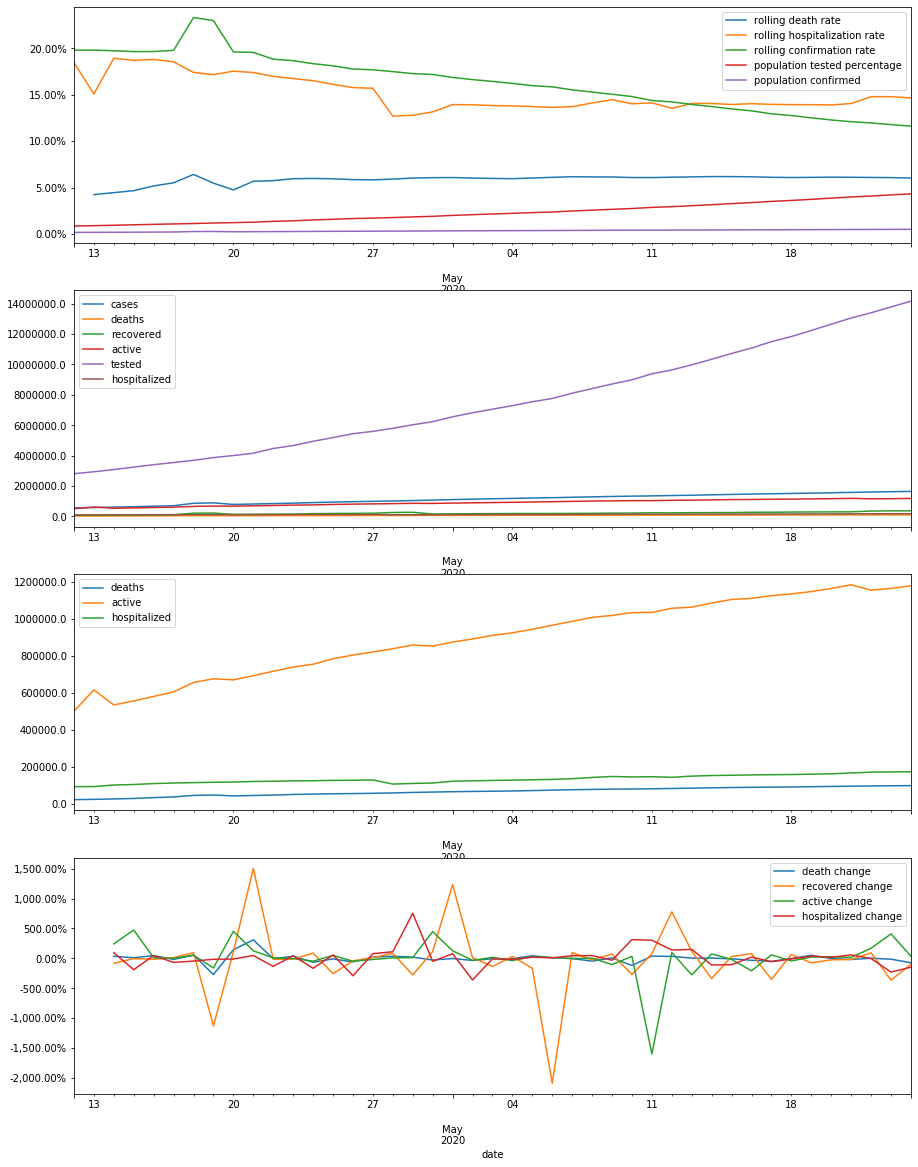

In [29]:
def plotit(columns, ax,df=df):
    for c in columns:
        df.plot(kind='line',x='date',y=c,ax=ax)

def getMedian(column, df=df):
    return round(df[column].median()*100,3)
    
def getMean(column, df=df):
    return round(df[column].mean()*100,3)
    
def getMin(column, df=df):
    return round(df[column].min()*100,3)
    
def getMax(column, df=df):
    return round(df[column].max()*100,3)
 
def getStats(column, df=df):
    d = {'statistic':column
        ,'median':getMedian(column)
        ,'mean':getMean(column)
        ,'minimum':getMin(column)
        ,'maximum':getMax(column)}
    return d

fig = plt.gcf()
fig.set_size_inches(15, 20)

ax1 = plt.subplot(411)
plotit(['rolling death rate','rolling hospitalization rate','rolling confirmation rate','population tested percentage','population confirmed'],ax1)
vals = ax1.get_yticks()
ax1.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

ax2 = plt.subplot(412)
plotit(['cases','deaths','recovered','active','tested','hospitalized'],ax2)
vals = ax2.get_yticks()
ax2.set_yticklabels(['{:}'.format(x) for x in vals])

ax3 = plt.subplot(413)
plotit(['deaths','active','hospitalized'], ax3)
vals = ax3.get_yticks()
ax3.set_yticklabels(['{:}'.format(x) for x in vals])

ax4 = plt.subplot(414)
plotit(['death change','recovered change','active change','hospitalized change'], ax4)
vals = ax4.get_yticks()
ax4.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

df_stats = pd.DataFrame(getStats('rolling death rate'),index=[0])
df_stats = df_stats.append(getStats('rolling confirmation rate'), ignore_index=True)
df_stats = df_stats.append(getStats('rolling hospitalization rate'), ignore_index=True)
df_stats = df_stats.append(getStats('population tested percentage'), ignore_index=True)
df_stats = df_stats.append(getStats('population confirmed'), ignore_index=True)

df_stats.head()
#plt.show();

In [94]:
df.head(20)

,date,cases,deaths,recovered,active,tested,hospitalized,case delta,death delta,recovered delta,...,rolling recovery rate,rolling confirmation rate,rolling hospitalization rate,rolling active rate,case change,death change,recovered change,active change,tested change,hospitalized change
0,2020-04-12,555313,22019,67139.0,500306.0,2805892.0,92251.0,NaN,NaN,NaN,...,NaN,0.197910,0.184389,0.900944,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-04-13,580619,23528,78924.0,615609.0,2935006.0,92802.0,25306.0,1509.0,11785.0,...,0.142125,0.197825,0.150748,1.060263,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-04-14,607670,25831,85408.0,534076.0,3081620.0,101017.0,27051.0,2303.0,6484.0,...,0.147098,0.197192,0.189143,0.878892,0.064508,0.344768,-0.817551,2.414188,0.119361,0.932928
3,2020-04-15,636350,28325,91501.0,555929.0,3242755.0,103839.0,28680.0,2494.0,6093.0,...,0.150577,0.196237,0.186785,0.873621,0.056799,0.076584,-0.064172,4.730975,0.090117,-1.911056
4,2020-04-16,667801,32916,96735.0,580182.0,3401064.0,108942.0,31451.0,4591.0,5234.0,...,0.152015,0.196351,0.187772,0.868795,0.088105,0.456763,-0.164119,0.098957,-0.017851,0.446992
5,2020-04-17,699706,36773,102639.0,604388.0,3541368.0,111972.0,31905.0,3857.0,5904.0,...,0.153697,0.197581,0.185265,0.863774,0.014230,-0.190303,0.113482,-0.001942,-0.128328,-0.684158
6,2020-04-18,859536,44835,210201.0,655890.0,3690482.0,114029.0,159830.0,8062.0,107562.0,...,0.300413,0.232906,0.173854,0.763074,0.800382,0.521583,0.945111,0.529999,0.059082,-0.473019
7,2020-04-19,887758,47002,218928.0,675458.0,3865864.0,115792.0,28222.0,2167.0,8727.0,...,0.254705,0.229640,0.171427,0.760858,-4.663312,-2.720351,-11.325198,-1.631950,0.149776,-0.166761
8,2020-04-20,784326,42094,126767.0,669903.0,4003551.0,117363.0,-103432.0,-4908.0,-92161.0,...,0.142795,0.195908,0.175194,0.854113,1.272856,1.441524,1.094693,4.522592,-0.273773,-0.122215
9,2020-04-21,811865,44444,133321.0,692217.0,4155178.0,120268.0,27539.0,2350.0,6554.0,...,0.169982,0.195386,0.173743,0.852626,4.755837,3.088511,15.061794,1.248947,0.091936,0.459208
